<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M6_AI3_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 3. Algoritmo de Random Forest**

**Entrega: RECONOCIMIENTO DE NÚMEROS ESCRITOS A MANO**


# **Descripción de la tarea**

###Contexto

La base de datos MNIST (base de datos modificada del Instituto Nacional de Estándares y Tecnología) es una gran base de datos de dígitos escritos a mano que se usa, comúnmente, para entrenar varios sistemas de procesamiento de imágenes. La base de datos MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba.

Se puede descargar manualmente desde la web, sin embargo, la librería TensorFlow la tiene disponible.

Disponemos de la siguiente información:

* X_train: array de 60.000x28x28, donde cada celda representa un pixel de las diferentes imágenes. Es decir, que tenemos un set de entrenamiento de 60.000 dígitos de 28x28 píxeles (784 pixels) cada uno. Los valores de cada celda representan el código RGB en escala de grises de los diferentes píxeles (0 es blanco y 255 es negro). 
* Y_train: array de 60.000 filas, donde cada fila tiene el valor entero del dígito de la imagen. 
* X_test: array de 10.000x28x28, donde cada celda representa un pixel de las diferentes imágenes. Es decir, que tenemos un set de test de 10.000 dígitos de 28x28 píxeles (784 pixels) cada uno. Los valores de cada celda representan el código RGB en escala de grises de los diferentes píxeles (0 es blanco y 255 es negro). 
* Y_test: array de 10.000 filas, donde cada fila tiene el valor entero del dígito de la imagen.


Con estos datos, debes generar un modelo con el algoritmo de Random Forest que pueda encontrar patrones de reconocimiento de imágenes.

Se pide seguir lo expuesto en la guía de uso de la librería Scikit-Learn.
En dicha página, se lleva a cabo usando el dataset de MNIST de la librería Scikit-Learn y aplicando el algoritmo de Support Vector Machine (SVM).

Deberás hacer los cambios que procedan para usar el dataset de TensorFlow (que es más extenso y con más resolución) y cambiar SVM por Random Forest.



### **Importación librerias**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import datasets, svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Lectura del dataset desde TensorFlow. 

In [39]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [40]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [41]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Podemos ver que los datos son del tipo numpy.narray de tres dimensiones, en el caso de los datos de train ya que son imagenes de 28x28 pixeles.

# Aplicar las conversiones necesarias para pasar de 3d-array a 2d-array (con “reshape”).

In [42]:
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

In [43]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

En esta sección se ha transformado las variables x_train y x_test que son las matrices de tres dimensiones a matrices bidimensionales, transformando a 784 columnas (28x28). Cada columna representa a un pixel de la imagen.

# Crear la variable “n_train” para poder generar diferentes modelos.

Considerando que se cuenta con 60.000 registros en train y 10.000 en test, lo que nos indica que el test representa un 14,2% aproximadamente, se procederá a seleccionar la misma proporción para los n_train solicitados, además se incluirá en el análisis el total de la data de train y en consecuencia la totalidad de test. Así se tendran tres modelos (n_train=600, 6000 y 60000), sin considerar otros parametros en el modelo RandomForestClassifier() en esta parte del ejercicio.

In [44]:
# Creamos una matriz con 3 elementos con los valores asociados a train y test de cada uno de los modelos:

n_train = [(600,100),(6000,1000),(60000,10000)]


# Generar un modelo con cada uno de los siguientes valores de n_train

In [45]:
for val in n_train:
  # Defino los set en entrenamientos y test de diferentes tamaños:
  X_train_sub = x_train[0:val[0]]
  y_train_sub = y_train[0:val[0]]

  X_test_sub = x_test[0:val[1]]
  y_test_sub = y_test[0:val[1]]

  rf_model = RandomForestClassifier(random_state=0, n_jobs=5)
  rf_model.fit(X_train_sub,y_train_sub)
  print(f"Precision para n_train: {str(val[0])} train / {str(val[1])} test \n")
  pred_train = rf_model.predict(X_train_sub)
  pred_test = rf_model.predict(X_test_sub)
  print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train_sub, y_train_sub)))
  print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test_sub, y_test_sub)))
  print("\n")
  print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test_sub, pred_test)}\n")
  print("\n\n")

Precision para n_train: 600 train / 100 test 

Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 86.00


Classification report for classifier RandomForestClassifier(n_jobs=5, random_state=0):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00        14
           2       0.64      0.88      0.74         8
           3       0.92      1.00      0.96        11
           4       0.86      0.86      0.86        14
           5       1.00      0.57      0.73         7
           6       0.86      0.60      0.71        10
           7       0.93      0.87      0.90        15
           8       0.50      0.50      0.50         2
           9       0.77      0.91      0.83        11

    accuracy                           0.86       100
   macro avg       0.84      0.82      0.82       100
weighted avg       0.87      0.86      0.86       100





Precision

Los tres modelos se ha entrenado utilizando los hiperparámetros con su valor por defecto, así se puede concluir que:

* En el primer modelo con n_train = 600 nuestro accuracy fue de 100% para el train y de un 86% para test. Esto se explica en la cantidad de registros de entrenamientos, que es menor a la cantidad de predictores que contamos (784). Así el modelo presenta overfitting.

* En el modelo con n_train = 6000 nuestro accuracy en train es del 100% y en test del 93%, aunque es mucho mejor ma metrica para los datos en test, aun presenta overfitting, esto se debe a que hemos utilizado una cantidad de datos para entrenar no lo sufiente para evitar este overfitting.

* En el modelo con n_train = 60000 o sea con la totalidad de los datos, se consigue un accuracy de 100% para los datos de entrenamiento y de un 97% para los datos de entrenamiento. Sin duda, que el modelo puede generar una mejor estimación de las clases al entrenar y al testear con la totalidad de los datos.


# Realizar diferentes modelos cambiando los valores de n_estimators y max_depth. 


Utilizaremos RandomizedSearchCV de scikit-learn basado en Cross-Validation.

RandomizedSearchCV es muy útil cuando tenemos muchos parámetros para probar y el tiempo de entrenamiento es muy largo.

Se definen los parametros a utilizar (Se pueden definir más parametros segun el algoritmo que deseamos ocupar, para nuestro caso, nos basamos en https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):

In [46]:
# Numeros de arboles en Random Forest
# Vamos a utilizar 10 valores de n_estimadores empezando con 10 y concluyendo en 300
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]

# El número de características a tener en cuenta al buscar la mejor división
max_features = ['auto', 'sqrt', 'log2']

# La profundidad máxima del árbol.
# Se probará 8 distintas profundidades desde 2 hasta 21
max_depth = [int(x) for x in np.linspace(start = 2, stop = 21, num = 8)]

# La función para medir la calidad de un split
criterion = ['gini', 'entropy','log_loss']

In [47]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'criterion': criterion
             }

Aplicamos la funcion RamdomizedSearchCV con el estimador RamdomForestClassifier y con Cross-Validation, incluyendo los parametros definidos.

In [48]:
rf_RandomGrid = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 0), scoring    = 'accuracy', return_train_score = True,
                                   param_distributions = param_grid, cv = 5, verbose=0, n_jobs = -1, random_state = 0)

Aplicamos para n_train = 600, 6000 y 60000.

## Modelo n_train = 600

Consideramos los primeros 600 registros para train y 100 registros para testear del dataset original (solo el 1% en ambos casos).

In [49]:
X_train_600 = x_train[0:600]
y_train_600 = y_train[0:600]

X_test_100 = x_test[0:100]
y_test_100 = y_test[0:100]

In [50]:
rf_RandomGrid.fit(X_train_600, y_train_600)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 7, 10, 12, 15, 18,
                                                      21],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300]},
                   random_state=0, return_train_score=True, scoring='accuracy')

* Los mejores parametros para n_train = 600.

In [51]:
rf_RandomGrid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 267}

In [52]:
resultados = pd.DataFrame(rf_RandomGrid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_n_estimators,param_max_features,param_max_depth,param_criterion,mean_test_score,std_test_score,mean_train_score,std_train_score
5,267,log2,10,entropy,0.855000,0.030092,1.000000,0.000000
9,171,log2,7,gini,0.848333,0.022608,0.993750,0.003486
3,74,log2,12,gini,0.841667,0.021731,1.000000,0.000000
8,300,auto,12,entropy,0.836667,0.030092,1.000000,0.000000
7,10,sqrt,4,gini,0.718333,0.024381,0.844583,0.013476


Identificados los mejores hiperparámetros, se reentrenará el modelo indicando los valores óptimos en sus argumentos, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

In [53]:
model_600 = rf_RandomGrid.best_estimator_

Se evalúa la capacidad predictiva del modelo empleando el conjunto de test.

In [54]:
predict_600 = model_600.predict(X = X_test_100)

Confusion matrix:



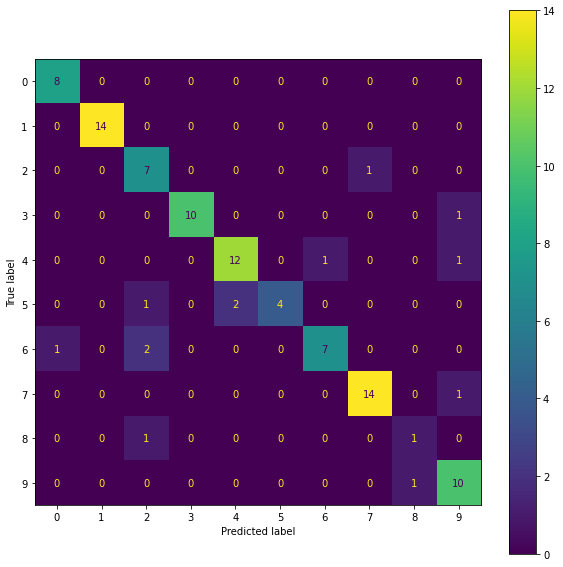

In [55]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(model_600, X_test_100, y_test_100, cmap=plt.cm.viridis, ax=ax)
plt.show()

In [56]:
print(f"Classification report for classifier {model_600}:\n"
      f"{metrics.classification_report(y_test_100, predict_600)}\n")

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=267, random_state=0):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00        14
           2       0.64      0.88      0.74         8
           3       1.00      0.91      0.95        11
           4       0.86      0.86      0.86        14
           5       1.00      0.57      0.73         7
           6       0.88      0.70      0.78        10
           7       0.93      0.93      0.93        15
           8       0.50      0.50      0.50         2
           9       0.77      0.91      0.83        11

    accuracy                           0.87       100
   macro avg       0.85      0.83      0.83       100
weighted avg       0.88      0.87      0.87       100




In [57]:
print(f'Train Accuracy : {rf_RandomGrid.score(X_train_600,y_train_600):.3f}')
print(f'Test Accuracy  : {rf_RandomGrid.score(X_test_100,y_test_100):.3f}')

Train Accuracy : 1.000
Test Accuracy  : 0.870


* Ejemplo de predicción:

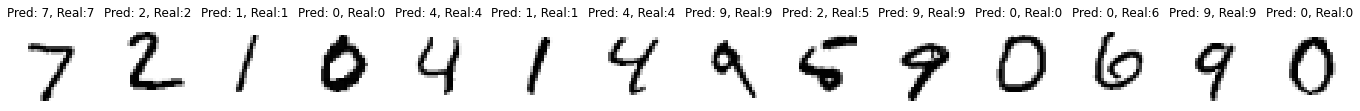

In [67]:
_, axes = plt.subplots(nrows=1, ncols=14, figsize=(24, 18))
for ax, image, prediction, real in zip(axes, X_test_100, predict_600, y_test_100):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

## Modelo n_train = 6000

Consideramos los primeros 6000 registros para train y 1000 registros para testear del dataset original (el 10% en ambos casos).

In [68]:
X_train_6000 = x_train[0:6000]
y_train_6000 = y_train[0:6000]

X_test_1000 = x_test[0:1000]
y_test_1000 = y_test[0:1000]

In [69]:
rf_RandomGrid.fit(X_train_6000, y_train_6000)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 7, 10, 12, 15, 18,
                                                      21],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300]},
                   random_state=0, return_train_score=True, scoring='accuracy')

* Los mejores parametros para n_train = 6000

In [70]:
rf_RandomGrid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 300}

In [71]:
resultados = pd.DataFrame(rf_RandomGrid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_n_estimators,param_max_features,param_max_depth,param_criterion,mean_test_score,std_test_score,mean_train_score,std_train_score
8,300,auto,12,entropy,0.938500,0.005359,0.999917,0.000102
5,267,log2,10,entropy,0.929667,0.005416,0.995292,0.000520
3,74,log2,12,gini,0.926667,0.012748,0.998250,0.000212
9,171,log2,7,gini,0.896000,0.006549,0.944708,0.001810
7,10,sqrt,4,gini,0.742167,0.010975,0.768583,0.013296


Identificados los mejores hiperparámetros, se reentrenará el modelo indicando los valores óptimos en sus argumentos, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

In [72]:
model_6000 = rf_RandomGrid.best_estimator_

Se evalúa la capacidad predictiva del modelo empleando el conjunto de test.

In [73]:
predict_6000 = model_6000.predict(X = X_test_1000)

Confusion matrix:



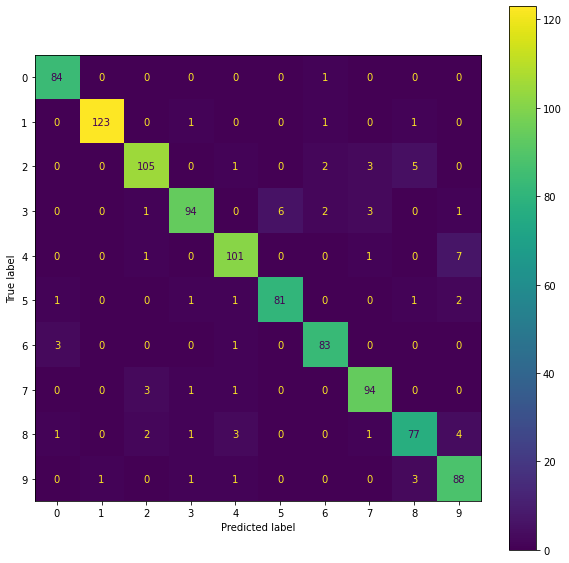

In [74]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(model_6000, X_test_1000, y_test_1000, cmap=plt.cm.viridis, ax=ax)
plt.show()

In [75]:
print(f"Classification report for classifier {model_6000}:\n"
      f"{metrics.classification_report(y_test_1000, predict_6000)}\n")

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=300,
                       random_state=0):
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.99      0.98      0.98       126
           2       0.94      0.91      0.92       116
           3       0.95      0.88      0.91       107
           4       0.93      0.92      0.92       110
           5       0.93      0.93      0.93        87
           6       0.93      0.95      0.94        87
           7       0.92      0.95      0.94        99
           8       0.89      0.87      0.88        89
           9       0.86      0.94      0.90        94

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000




In [76]:
print(f'Train Accuracy : {rf_RandomGrid.score(X_train_6000,y_train_6000):.3f}')
print(f'Test Accuracy  : {rf_RandomGrid.score(X_test_1000,y_test_1000):.3f}')

Train Accuracy : 1.000
Test Accuracy  : 0.930


* Ejemplo de Predicción:

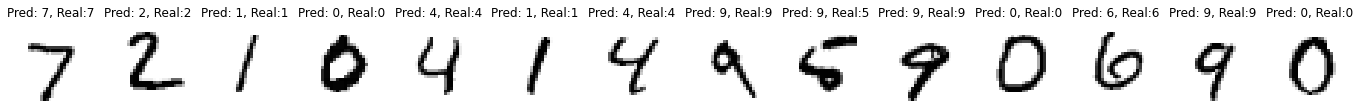

In [77]:
_, axes = plt.subplots(nrows=1, ncols=14, figsize=(24, 18))
for ax, image, prediction, real in zip(axes, X_test_1000, predict_6000, y_test_1000):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

## Modelo n_train = 60000

Consideramos el 100% de los datos (60000 para train, 10000 para testear).

In [78]:
X_train_60000 = x_train
y_train_60000 = y_train

X_test_10000 = x_test
y_test_10000 = y_test

In [79]:
rf_RandomGrid.fit(X_train_60000, y_train_60000)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 7, 10, 12, 15, 18,
                                                      21],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300]},
                   random_state=0, return_train_score=True, scoring='accuracy')

* Los mejores parametros para n_train = 60000

In [80]:
rf_RandomGrid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 300}

In [81]:
resultados = pd.DataFrame(rf_RandomGrid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_n_estimators,param_max_features,param_max_depth,param_criterion,mean_test_score,std_test_score,mean_train_score,std_train_score
8,300,auto,12,entropy,0.959617,0.003425,0.992858,0.000236
3,74,log2,12,gini,0.948333,0.002595,0.981525,0.000717
5,267,log2,10,entropy,0.940533,0.003988,0.964454,0.000607
9,171,log2,7,gini,0.900117,0.007554,0.908742,0.001080
7,10,sqrt,4,gini,0.747567,0.004860,0.747942,0.011849


Identificados los mejores hiperparámetros, se reentrenará el modelo indicando los valores óptimos en sus argumentos, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

In [82]:
model_60000 = rf_RandomGrid.best_estimator_

Se evalúa la capacidad predictiva del modelo empleando el conjunto de test.

In [83]:
predict_60000 = model_60000.predict(X = X_test_10000)

Confusion matrix:



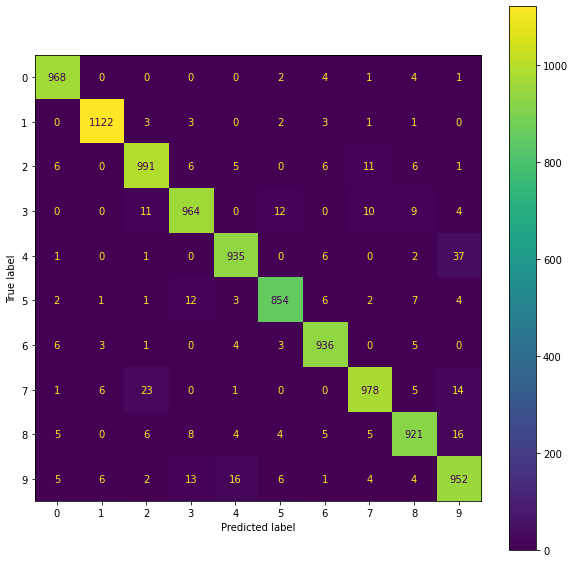

In [84]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(model_60000, X_test_10000, y_test_10000, cmap=plt.cm.viridis, ax=ax)
plt.show()

In [85]:
print(f"Classification report for classifier {model_60000}:\n"
      f"{metrics.classification_report(y_test_10000, predict_60000)}\n")

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=300,
                       random_state=0):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.96      0.95      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000




In [86]:
print(f'Train Accuracy : {rf_RandomGrid.score(X_train_60000,y_train_60000):.3f}')
print(f'Test Accuracy  : {rf_RandomGrid.score(X_test_10000,y_test_10000):.3f}')

Train Accuracy : 0.991
Test Accuracy  : 0.962


* Ejemplo de Predicción:

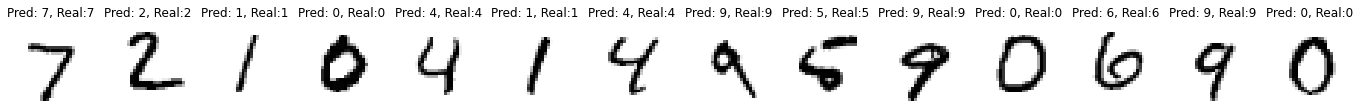

In [87]:
_, axes = plt.subplots(nrows=1, ncols=14, figsize=(24, 18))
for ax, image, prediction, real in zip(axes, X_test_10000, predict_60000, y_test_10000):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

# Comentar los resultados de los diferentes modelos. 

En primer lugar, en Random Forest el número de árboles no es un hiperparámetro crítico en cuanto que, añadir árboles, solo puede hacer que mejorar el resultado. En Random Forest no se produce overfitting por exceso de árboles. Sin embargo, añadir árboles una vez que la mejora se estabiliza es una perdida te recursos computacionales.

## Modelo n_train = 600

Este modelo solo considero el 1% de la data total que disponiamos tanto en train como en test. Es asi, que utilizando los mejores estimadores encontrados por RandomzedSearchCV se pudo mejorar nuestro accuracy de 86% a 87% para datos de entrenamientos, y manteniendo el 100% para los datos de train. Claramente este modelo presenta un overfitting que se debe principalmente al poco porcentaje de data en entrenamiento que es inferior al numero de predictores que contamos (784).

Con respecto a los mejores estimadores, el modelo tuvo su mejor metrica asociada a max_depth: 10 y con n_estimators: 267, considerando que se realizo un analisis de hasta 300 estimadores.

Además en el Reporte de Clasificación se puede distinguir que existen clases con un bajo nivel de accuracy como son 2, 8 y 9 (inferiores a 0.8).

## Modelo n_train = 6000

Este modelo se entreno con el 10% de la data original y se testeo con el mismo procentaje. Comparando el modelo con los ajustes predeterminados contra el modelo ajustado con los mejores estimadores, se puede observan que ambos mejoran el accuracy para los datos de test a un 93%, mientras que los datos de train alcanzan el 100%. Aún así, esto aún genera overfitting considerando que disponemos aún con pocos datos de entrenamientos.

El modelo generado optimo fue generado con un max_depth de 12 y con n_estimators=300. Como se menciono en el apartado inicial de este analisis, la mejora puede darse con una menor cantidad de árboles, solo que al tener un máximo de 300, el número de árboles podría estar estabilizado en un punto inferior a este. A diferencia del modelo que solo tomo el 1% de los datos, nuestros árboles en este modelo tuvieron una profundidad máxima de 12.

Ahora referente al analisis de la Clasificación de Clases, con este modelo las clases 8 y 9 son las que presentan menor accuracy (cercanas a 90%), pero ya es una metrica muy aceptable.


## Modelo n_train = 60000

Este modelo se entreno con el 100% de la data original y se testeo con el mismo procentaje. Claramente este modelo es el que mejor metrica de accuracy presenta en los datos de test con un 96% contra un 99% para los datos de train. Este modelo ya se puede considerar sin overfitting.

Al igual que el modelo anterior los mejores estimadores estan en max_depth = 12 y n_estimators = 300, coincidiendo el análisis en este último punto del modelo anterior.

En el analisis de Clasificación de Clases, todas las clases presentan valores muy similares, con accuracy superiores a 97% en todas las clases, a excepeción de la clase 9 que presenta un 93%.

## Conclusión Final

Se puede indicar que un modelo asociado a uin Clasificador Random Forest debe considerarse la busqueda de los parametros indicados para poder optimizar el modelo. Acá la elección de la profundidad del árbol, como el numero de estimadores fue esencial para mejorar y evitar el overfitting.

Si bien es cierto que el proceso de bagging (Random Forest) consigue mejorar la capacidad predictiva en comparación a los modelos basados en un único árbol, esto tiene un coste asociado, la interpretabilidad del modelo se reduce. Al tratarse de una combinación de múltiples árboles, no es posible obtener una representación gráfica sencilla del modelo y no es inmediato identificar de forma visual que predictores son más importantes.

